In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df['Gender']=df['Gender'].str.replace(r"Male","1")
df['Gender']=df['Gender'].str.replace(r"Female","0")

In [6]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


In [7]:
x=df[['Gender','Age','EstimatedSalary']]

In [8]:
y=df['Purchased']

In [9]:
x,y

(    Gender  Age  EstimatedSalary
 0        1   19            19000
 1        1   35            20000
 2        0   26            43000
 3        0   27            57000
 4        1   19            76000
 ..     ...  ...              ...
 395      0   46            41000
 396      1   51            23000
 397      0   50            20000
 398      1   36            33000
 399      0   49            36000
 
 [400 rows x 3 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

In [22]:
support=SVC(kernel='linear')
support.fit(x_train,y_train)
y_pred_linear=support.predict(x_test)

In [12]:
cv_svm_linear=confusion_matrix(y_test,y_pred_linear)
cr_svm_linear=classification_report(y_test,y_pred_linear)

print(cv_svm_linear)
print(cr_svm_linear)
cr_svm_score_linear=support.score(x_test,y_test)
print(cr_svm_score_linear)

[[49  7]
 [ 8 16]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        56
           1       0.70      0.67      0.68        24

    accuracy                           0.81        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.81      0.81      0.81        80

0.8125


In [13]:
support=SVC(kernel='rbf')
support.fit(x_train,y_train)
y_pred_rbf=support.predict(x_test)
cv_svm_rbf=confusion_matrix(y_test,y_pred_rbf)
cr_svm_rbf=classification_report(y_test,y_pred_rbf)
print(cv_svm_rbf)
print(cr_svm_rbf)

cr_svm_score_rbf=support.score(x_test,y_test)
print(cr_svm_score_rbf)

[[54  2]
 [13 11]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        56
           1       0.85      0.46      0.59        24

    accuracy                           0.81        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.82      0.81      0.79        80

0.8125


In [29]:
support=SVC(kernel='sigmoid')
support.fit(x_train,y_train)
y_pred_sigmoid=support.predict(x_test)
cv_svm_sigmoid=confusion_matrix(y_test,y_pred_sigmoid)
cr_svm_sigmoid=classification_report(y_test,y_pred_sigmoid)
print(cv_svm_sigmoid)
print(cr_svm_sigmoid)
cr_svm_score_sigmoid=support.score(x_test,y_test)
print(cr_svm_score_sigmoid)

[[33 23]
 [19  5]]
              precision    recall  f1-score   support

           0       0.63      0.59      0.61        56
           1       0.18      0.21      0.19        24

    accuracy                           0.48        80
   macro avg       0.41      0.40      0.40        80
weighted avg       0.50      0.47      0.49        80

0.475


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores=[]
for n in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    y_pred_knn=knn.predict(x_test)
    z=metrics.accuracy_score(y_test,y_pred_knn)
    scores.append(z)
    print('Accuracy for n=',n," is ",z)

Accuracy for n= 2  is  0.75
Accuracy for n= 3  is  0.8
Accuracy for n= 4  is  0.825
Accuracy for n= 5  is  0.8625
Accuracy for n= 6  is  0.8625
Accuracy for n= 7  is  0.85
Accuracy for n= 8  is  0.875
Accuracy for n= 9  is  0.825
Accuracy for n= 10  is  0.8375
Accuracy for n= 11  is  0.8375
Accuracy for n= 12  is  0.875
Accuracy for n= 13  is  0.875
Accuracy for n= 14  is  0.85
Accuracy for n= 15  is  0.825
Accuracy for n= 16  is  0.85
Accuracy for n= 17  is  0.8125
Accuracy for n= 18  is  0.825
Accuracy for n= 19  is  0.8125


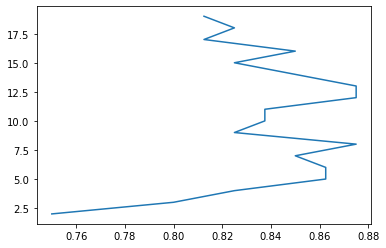

In [16]:
r=range(2,20)
plt.plot(scores,r)

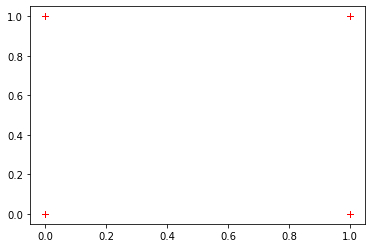

In [40]:
plt.plot(y_test,y_pred_linear,'r+')

<BarContainer object of 80 artists>

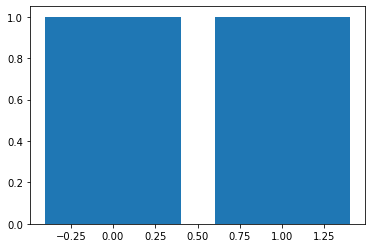

In [49]:
plt.bar(y_test,y_pred_linear)

<BarContainer object of 80 artists>

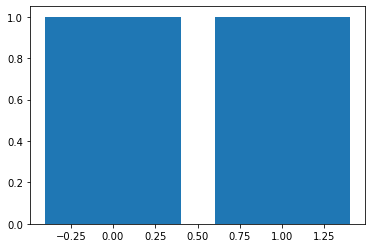

In [50]:
plt.bar(y_test,y_pred_knn)

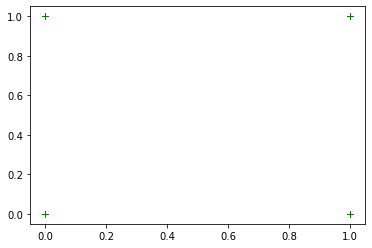

In [39]:
plt.plot(y_test,y_pred_knn,'g+')

In [24]:
score_linear=support.score(x_train,y_train)

In [25]:
knn_score=knn.score(x_train,y_train)

In [28]:
score_rbf=support.score(x_train,y_train)

In [30]:
score_sigmoid=support.score(x_train,y_train)

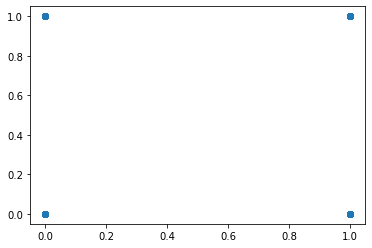

In [32]:
plt.scatter(y_test,y_pred_linear)

In [33]:
cv_svm_knn=confusion_matrix(y_test,y_pred_knn)
cr_svm_knn=classification_report(y_test,y_pred_knn)

In [34]:
cv_svm_knn

array([[50,  6],
       [ 9, 15]], dtype=int64)

In [37]:
cv_svm_knn,cr_svm_knn

(array([[50,  6],
        [ 9, 15]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87        56\n           1       0.71      0.62      0.67        24\n\n    accuracy                           0.81        80\n   macro avg       0.78      0.76      0.77        80\nweighted avg       0.81      0.81      0.81        80\n')

In [41]:
score_linear

0.834375

In [44]:
knn_score

0.85625

In [43]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_score=knn.score(x_train,y_train)

In [45]:
score_linear

0.834375

In [46]:
knn_score

0.85625

In [47]:
print(cv_svm_linear)
print(cr_svm_linear)

[[49  7]
 [ 8 16]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        56
           1       0.70      0.67      0.68        24

    accuracy                           0.81        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.81      0.81      0.81        80



In [48]:

print(cv_svm_knn)
print(cr_svm_knn)

[[50  6]
 [ 9 15]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        56
           1       0.71      0.62      0.67        24

    accuracy                           0.81        80
   macro avg       0.78      0.76      0.77        80
weighted avg       0.81      0.81      0.81        80

